In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Arc
import math
from skimage import data, transform
from IPython.display import display, Markdown

# Sistemas de Ecuaciones y Dimensiones

## Sistemas Ecuaciones - 2 Dimensiones

Usemos 2 ecuaciones de 2 dimensiones

$
\begin{aligned}
x + y &= 4            \\[6pt]
2x - y &= 1         
\end{aligned}
$

Si despejamos, esto nos lleva a 2 rectas:

$
\begin{aligned}
y &= 4 - x            \\[6pt]
y &= 2x - 1          
\end{aligned}
$

Vamos a representar estos valores mediante matrices y vectores, y vamos a usar np.linalg.solve para obtener la solución. Vamos a plotearlo también para ver si la solución tiene sentido

In [ ]:
# Solucion con lineal algebra
#
A = np.array([[1,1], [2,-1]])
B = np.array([4,1])
sol = np.linalg.solve(A,B)
print(sol)


[1.66666667 2.33333333]


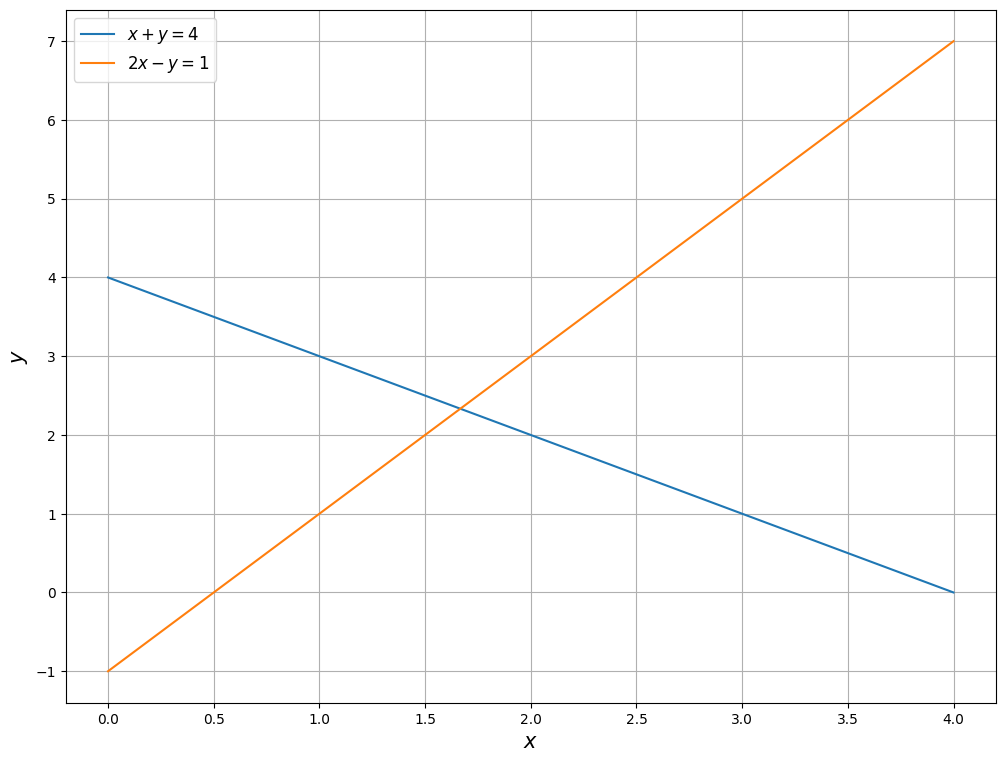

In [ ]:
# Representación
x_vals = np.linspace(0, 4, 100)
y1 = 4 - x_vals          # x + y = 4
y2 = 2 * x_vals - 1      # 2x - y = 1 => y = 2x - 1

fig = plt.figure(figsize=(12, 9))
plt.plot(x_vals, y1, label='$x + y = 4$')
plt.plot(x_vals, y2, label='$2x - y = 1$')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-813726436.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Solución gráfica en $\mathbb{R}^2$')


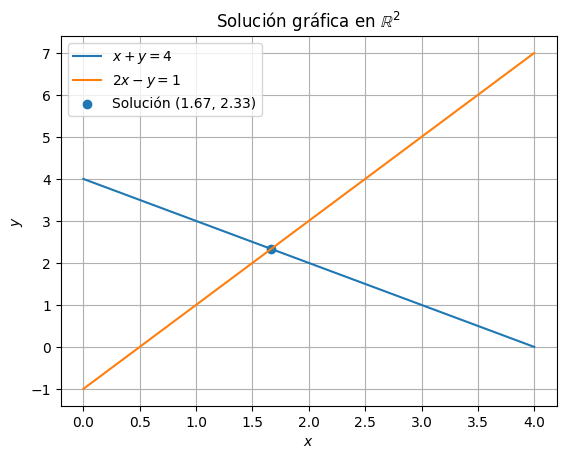

In [ ]:
# Representación
x_vals = np.linspace(0, 4, 100)
y1 = 4 - x_vals          # x + y = 4
y2 = 2 * x_vals - 1      # 2x - y = 1 => y = 2x - 1

fig = plt.figure()
plt.plot(x_vals, y1, label='$x + y = 4$')
plt.plot(x_vals, y2, label='$2x - y = 1$')
plt.scatter([sol[0]], [sol[1]], label=f'Solución ({sol[0]:.2f}, {sol[1]:.2f})')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Solución gráfica en $\mathbb{R}^2$')
plt.grid(True)
plt.show()

## Sistemas de ecuaciones - 3 dimensiones

En este caso tenemos 3 ecuaciones de 3 dimensiones



\begin{aligned}
x + y + z &= 6   \\[6pt]
2x - y + z &= 3  \\[6pt]
x + 2y - z &= 4  
\end{aligned}

Las cuales despejando se convierten en

\begin{aligned}
z = 6 - x - y\\[6pt]
z = 3 - 2x + y\\[6pt]
z = x + 2y - 4
\end{aligned}


In [ ]:
# --
A = np.array([[1,1,1],[2,-1,1], [1,2,-1]])
B = np.array([6,3,4])
sol = np.linalg.solve(A,B)
print(sol)



[1.57142857 2.28571429 2.14285714]


In [ ]:
xx, yy = np.meshgrid(np.linspace(-1, 5, 10), np.linspace(-1, 5, 10))

# Plano 1: x + y + z = 6 ->  ?
# --
z1 = 6 - xx - yy

# Plano 2: 2x - y + z = 3 -> ?
# --
z2 = 3 - 2 * xx + yy
# Plano 3: x + 2y - z = 4 -> ?
# --
 z3 =


fig = go.Figure()

# Plano 1
fig.add_trace(go.Surface(
    x=xx, y=yy, z=z1,
    name="x + y + z = 6",
    opacity=0.5, showscale=False,
    colorscale="Blues"
))

# Plano 2
fig.add_trace(go.Surface(
    x=xx, y=yy, z=z2,
    name="2x – y + z = 3",
    opacity=0.5, showscale=False,
    colorscale="Greens"
))

# Plano 3
fig.add_trace(go.Surface(
    x=xx, y=yy, z=z3,
    name="x + 2y – z = 4",
    opacity=0.5, showscale=False,
    colorscale="Reds"
))

# Punto de intersección
fig.add_trace(go.Scatter3d(
    x=[sol[0]], y=[sol[1]], z=[sol[2]],
    mode="markers",
    marker=dict(size=6, color="black"),
    name=f"Intersección ({sol[0]:.2f}, {sol[1]:.2f}, {sol[2]:.2f})"
))

# ---------- Ajustes de la vista ----------
fig.update_layout(
    title="Solución gráfica interactiva",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
        aspectmode="cube"
    ),
    legend=dict(itemsizing='constant')
)

fig.show()

NameError: name 'z1' is not defined

# Representacion de vectores

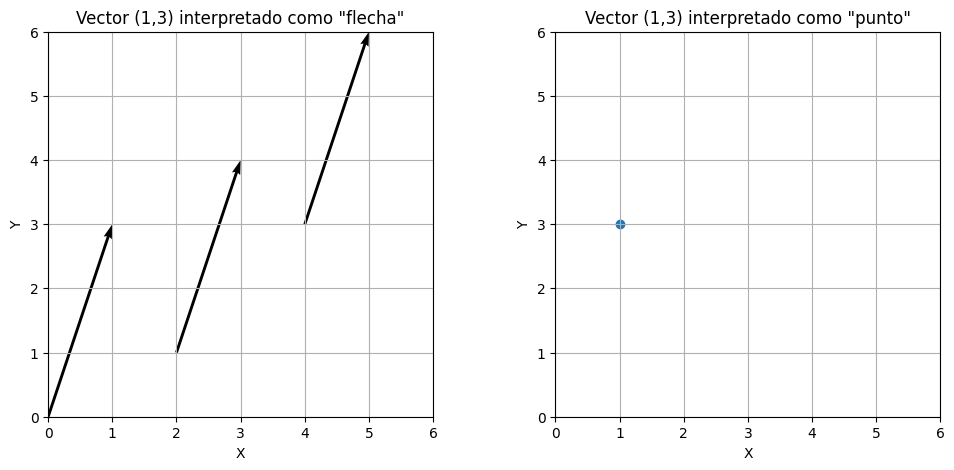

In [ ]:
vec = [1, 3]
origins = [(0, 0), (2, 1), (4, 3)]

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for x0, y0 in origins:
    ax1.quiver(x0, y0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1)

ax1.set_aspect('equal', 'box')
ax1.grid(True)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(0, 6)
ax1.set_xlim(0, 6)
ax1.set_title('Vector (1,3) interpretado como "flecha"')


ax2.scatter(1, 3, marker='o')
ax2.set_title('Vector (1,3) interpretado como "punto"')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(0, 6)
ax2.set_xlim(0, 6)
ax2.grid(True)
ax2.set_aspect('equal')

plt.show()



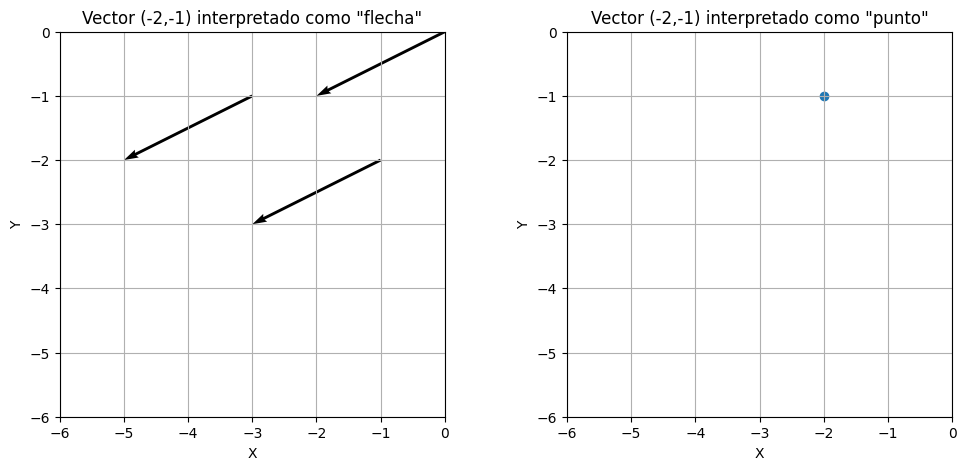

In [ ]:
vec_neg = [-2, -1]
origins_neg = [(0, 0), (-1, -2), (-3, -1)]

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for x0, y0 in origins_neg:
    ax1.quiver(x0, y0, vec_neg[0], vec_neg[1], angles='xy', scale_units='xy', scale=1)

ax1.set_aspect('equal', 'box')
ax1.grid(True)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-6, 0)
ax1.set_xlim(-6, 0)
ax1.set_title('Vector (-2,-1) interpretado como "flecha"')



ax2.scatter(-2, -1, marker='o')
ax2.set_title('Vector (-2,-1) interpretado como "punto"')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-6, 0)
ax2.set_xlim(-6, 0)
ax2.grid(True)
ax2.set_aspect('equal')

plt.show()

# Suma, Resta y multiplicacion de escalares en vectores - Interpretación geométrica

## Suma

In [ ]:
# --
# a
a = np.array([1,3])
b = np.array([4,2])
sum_ab = a + b
# b
# sum_ab

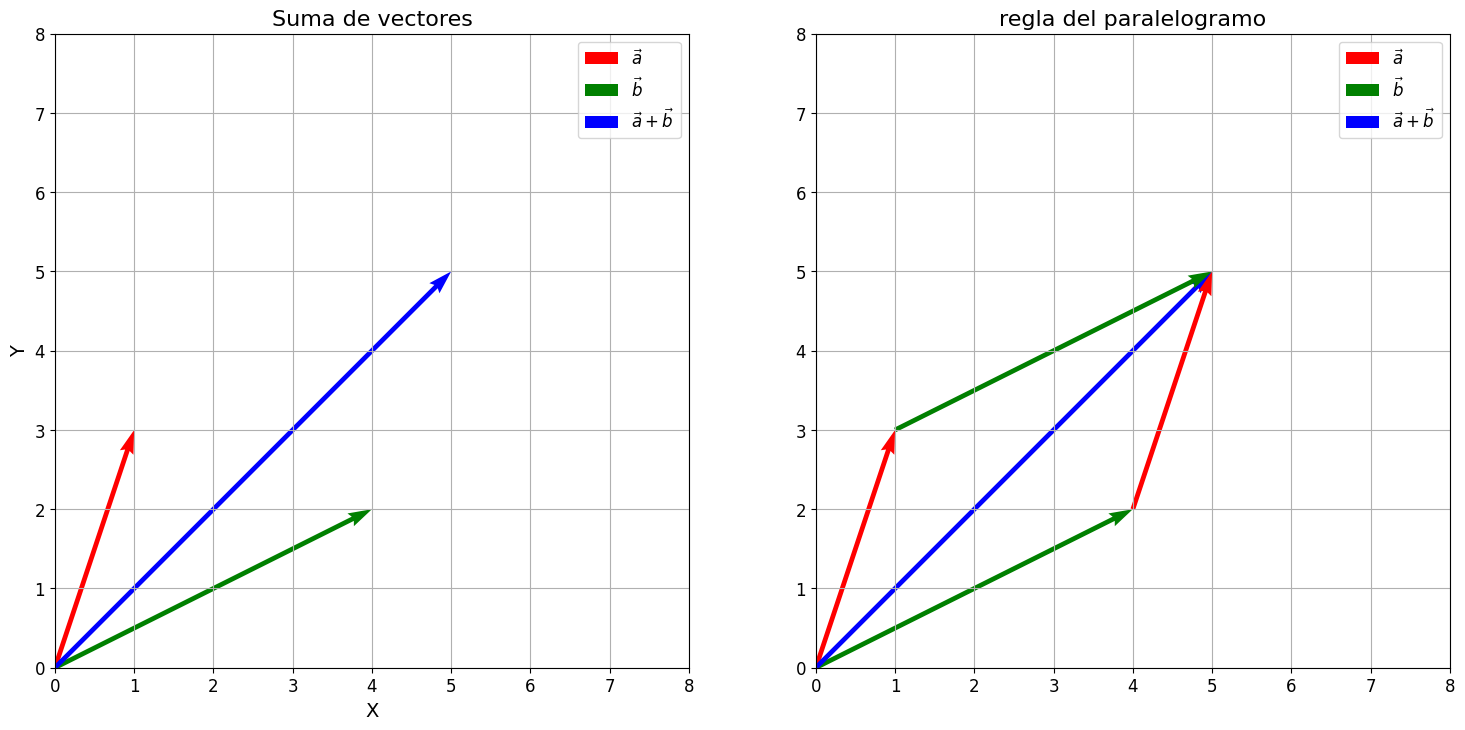

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))


# ---------------- suma de 2 vectores ----------------
q1 = ax1.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r')
q2 = ax1.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g')
q3 = ax1.quiver(0, 0, sum_ab[0], sum_ab[1], angles='xy', scale_units='xy', scale=1, color='b')

ax1.legend([q1, q2, q3], [r'$\vec{a}$', r'$\vec{b}$', r'$\vec{a} + \vec{b}$'], fontsize=12)


ax1.set_aspect('equal', 'box')
ax1.grid(True)
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_yticks(np.arange(0, 11, 1))
ax1.set_xlabel('X', fontsize=14)
ax1.set_ylabel('Y', fontsize=14)
ax1.set_ylim(0, 8)
ax1.set_xlim(0, 8)
ax1.set_title('Suma de vectores', fontsize=16)
ax1.tick_params(axis='both', labelsize=12)


# ---------------- regla del paralelogramo ----------------

q1 = ax2.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r')
q2 = ax2.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g')
q3 = ax2.quiver(0, 0, sum_ab[0], sum_ab[1], angles='xy', scale_units='xy', scale=1, color='b')

q4 = ax2.quiver(b[0], b[1], a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r')
q5 = ax2.quiver(a[0], a[1], b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g')

ax2.legend([q1, q2, q3], [r'$\vec{a}$', r'$\vec{b}$', r'$\vec{a} + \vec{b}$'], fontsize=12)


ax2.set_aspect('equal', 'box')
ax2.grid(True)
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_yticks(np.arange(0, 11, 1))
ax1.set_xlabel('X', fontsize=14)
ax1.set_ylabel('Y', fontsize=14)
ax2.set_ylim(0, 8)
ax2.set_xlim(0, 8)
ax2.set_title('regla del paralelogramo', fontsize=16)

ax2.tick_params(axis='both', labelsize=12)


plt.show()

In [ ]:
# --
# a =
# b =
# sum_ab =


In [ ]:



fig = go.Figure()

# Vector a (rojo)
fig.add_trace(go.Scatter3d(
    x=[0, a[0]], y=[0, a[1]], z=[0, a[2]],
    mode='lines+markers',
    line=dict(color='red', width=6),
    marker=dict(size=4),
    name=r'$\vec{a}$'
))

# Vector b (verde)
fig.add_trace(go.Scatter3d(
    x=[0, b[0]], y=[0, b[1]], z=[0, b[2]],
    mode='lines+markers',
    line=dict(color='green', width=6),
    marker=dict(size=4),
    name=r'$\vec{b}$'
))

# Suma a + b (azul)
fig.add_trace(go.Scatter3d(
    x=[0, sum_ab[0]], y=[0, sum_ab[1]], z=[0, sum_ab[2]],
    mode='lines+markers',
    line=dict(color='blue', width=6),
    marker=dict(size=4),
    name=r'$\vec{a} + \vec{b}$'
))

# Lado b trasladado a la punta de a (verde, dashed)
fig.add_trace(go.Scatter3d(
    x=[a[0], sum_ab[0]],
    y=[a[1], sum_ab[1]],
    z=[a[2], sum_ab[2]],
    mode='lines',
    line=dict(color='green', width=4, dash='dash'),
    showlegend=False
))

# Lado a trasladado a la punta de b (rojo, dashed)
fig.add_trace(go.Scatter3d(
    x=[b[0], sum_ab[0]],
    y=[b[1], sum_ab[1]],
    z=[b[2], sum_ab[2]],
    mode='lines',
    line=dict(color='red', width=4, dash='dash'),
    showlegend=False
))

fig.update_layout(
    scene=dict(
        xaxis=dict(range=[0, 10], tickmode='linear', tick0=0, dtick=1),
        yaxis=dict(range=[0, 10], tickmode='linear', tick0=0, dtick=1),
        zaxis=dict(range=[0, 10], tickmode='linear', tick0=0, dtick=1),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    title='Regla del paralelogramo para la suma de vectores en 3D',
    legend=dict(x=0.02, y=0.98)
)

fig.show()

## Resta

In [ ]:
# --
# c

c = np.array([1,4])
d = np.array([4,2])
diff_cd = c - d
# d
# diff_cd


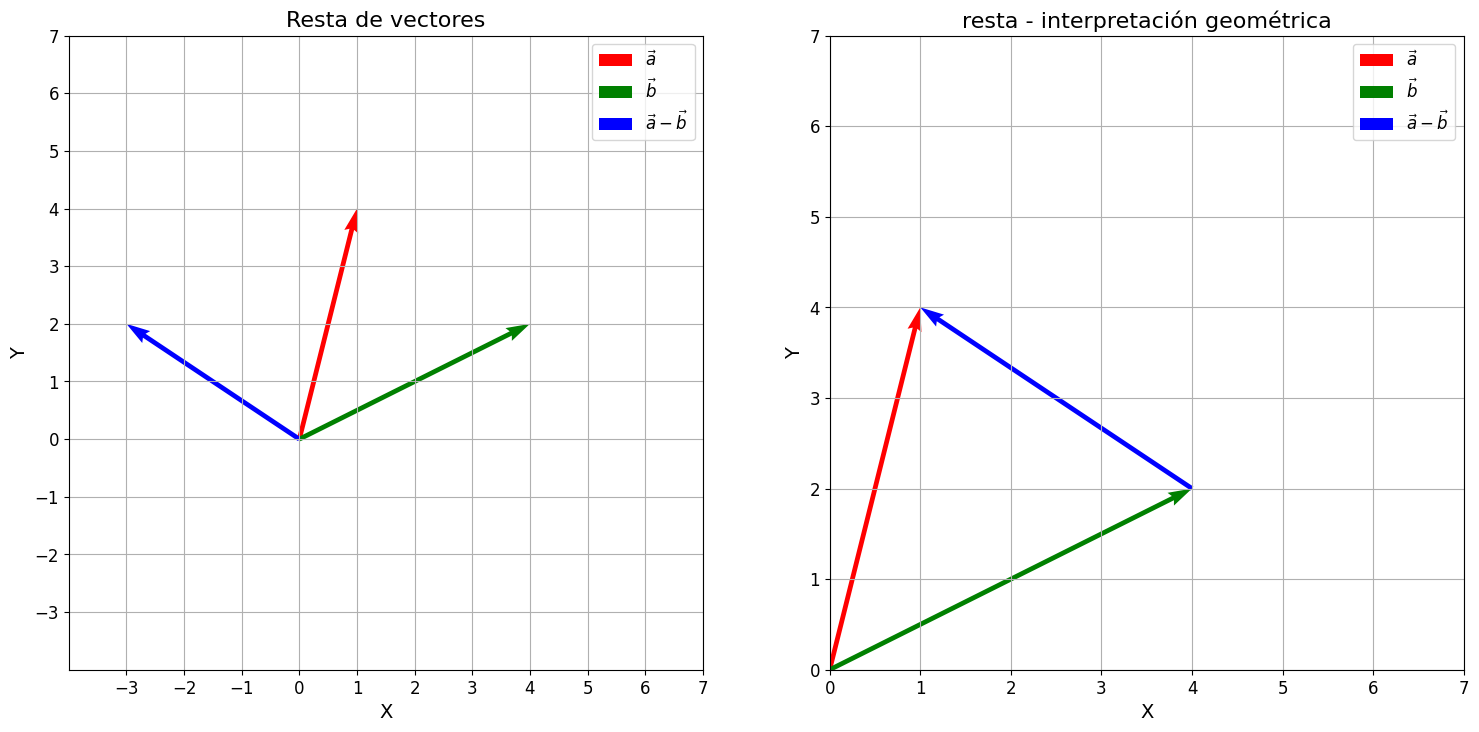

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))


# ---------------- Resta de 2 vectores ----------------
q1 = ax1.quiver(0, 0, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='r')
q2 = ax1.quiver(0, 0, d[0], d[1], angles='xy', scale_units='xy', scale=1, color='g')
q3 = ax1.quiver(0, 0, diff_cd[0], diff_cd[1], angles='xy', scale_units='xy', scale=1, color='b')

ax1.legend([q1, q2, q3], [r'$\vec{a}$', r'$\vec{b}$', r'$\vec{a} - \vec{b}$'], fontsize=12)


ax1.set_aspect('equal', 'box')
ax1.grid(True)
ax1.set_xticks(np.arange(-3, 11, 1))
ax1.set_yticks(np.arange(-3, 11, 1))
ax1.set_xlabel('X', fontsize=14)
ax1.set_ylabel('Y', fontsize=14)
ax1.set_ylim(-4, 7)
ax1.set_xlim(-4, 7)
ax1.set_title('Resta de vectores', fontsize=16)
ax1.tick_params(axis='both', labelsize=12)




# ---------------- interpretación geométrica ----------------

q1 = ax2.quiver(0, 0, c[0], c[1], angles='xy', scale_units='xy', scale=1, color='r')
q2 = ax2.quiver(0, 0, d[0], d[1], angles='xy', scale_units='xy', scale=1, color='g')
q3 = ax2.quiver(d[0], d[1], diff_cd[0], diff_cd[1], angles='xy', scale_units='xy', scale=1, color='b')



ax2.legend([q1, q2, q3], [r'$\vec{a}$', r'$\vec{b}$', r'$\vec{a} - \vec{b}$'], fontsize=12)


ax2.set_aspect('equal', 'box')
ax2.grid(True)
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_yticks(np.arange(0, 11, 1))
ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Y', fontsize=14)
ax2.set_ylim(0, 7)
ax2.set_xlim(0, 7)
ax2.set_title('resta - interpretación geométrica', fontsize=16)
ax2.tick_params(axis='both', labelsize=12)


plt.show()

## Multiplicación escalar

In [ ]:
# --
e = np.array([1,2])

factors = [1, 2, -1]
scaled = [e * factor for factor in factors]
# scaled

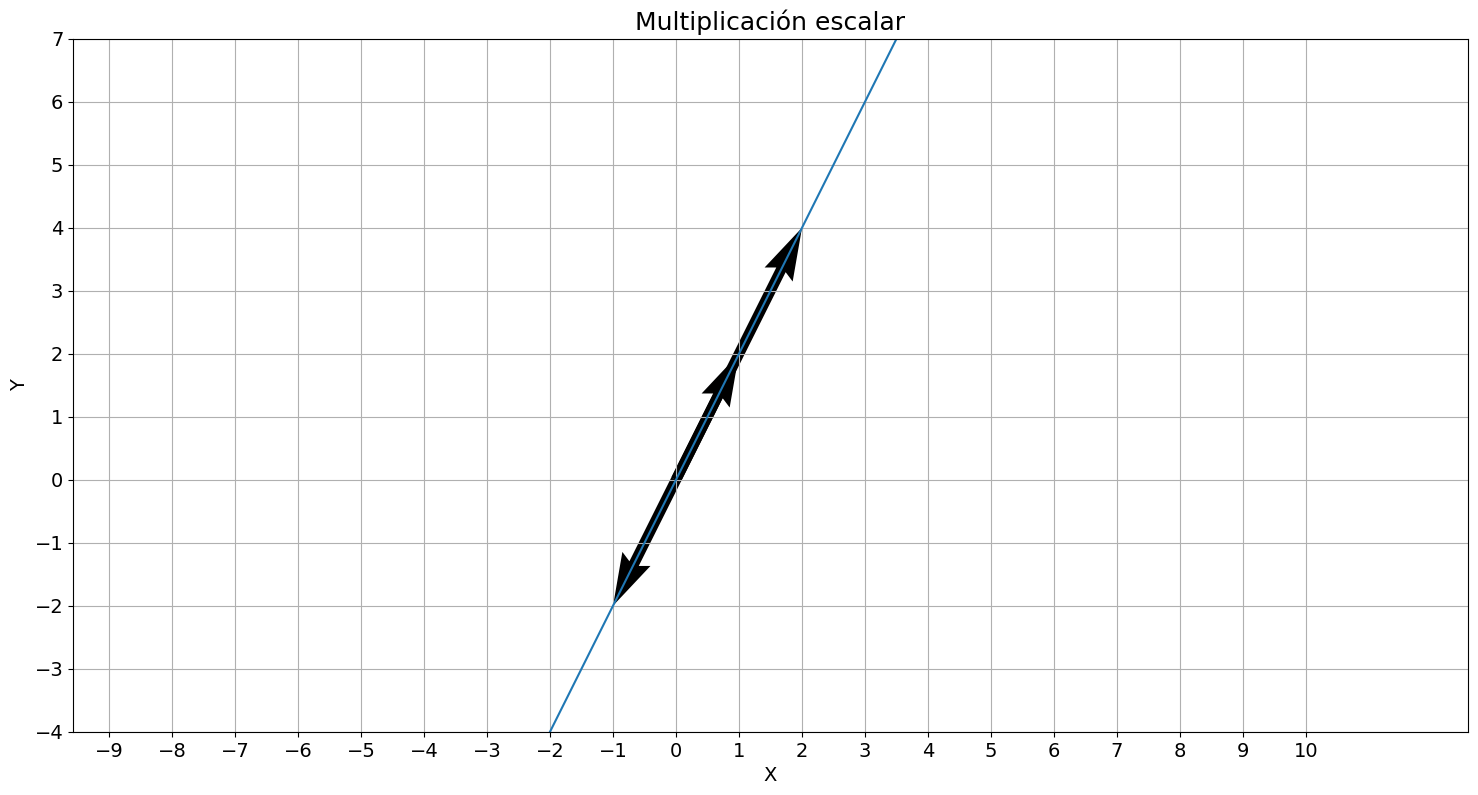

In [ ]:


plt.figure(figsize=(18, 9))
t = np.linspace(-5,5,100)
line = np.outer(t, e)
plt.plot(line[:,0], line[:,1])
for vec in scaled:
    plt.quiver(0,0, *vec, angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Multiplicación escalar', fontsize=18)

plt.xticks(np.arange(-10, 11, 1), fontsize=14)
plt.yticks(np.arange(-10, 11, 1), fontsize=14)

plt.ylim(-4, 7)
plt.xlim(-4, 7)

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)


plt.grid(True)
plt.show()

## Norma de un vector

In [ ]:
#NORMA: es la raíz cuadrada de la suma de los cuadrados
vec = [3, 2]
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 5))

ax1.plot([0, vec[0]], [0, 0], 'r--', label='Componente en X')
ax1.plot([vec[0], vec[0]], [0, vec[1]], 'b--', label='Componente en Y')

ax1.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='green', label=r'$\vec{a}$')

ax1.set_aspect('equal', 'box')
ax1.grid(True)
ax1.set_xlabel('X', fontsize=14)
ax1.set_ylabel('Y', fontsize=14)
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 3)
ax1.set_title('Vector (2,2) y sus componentes', fontsize=16)
ax1.tick_params(axis='both', labelsize=12)
ax1.legend(fontsize=12)
plt.show()


In [ ]:
np.linalg.norm(vec)

np.float64(2.23606797749979)

In [ ]:
sum_of_squares = 0
for component in vec:
  sum_of_squares += component ** 2
  norm = sum_of_squares ** 0.5


  print(norm)

1.0
2.23606797749979


## Producto interno

Prueba a cambiar los valores de a y b y mira como impacta en el resultado, comprueba que el angulo es el esperado, y a su vez, mira como impactan tanto el angulos como las normas de los vectores en el resultado

In [ ]:
#La suma de sus valores multiplicados a * b = ||a|| ||b|| cos º

#el angulo se calcula como = arcoseno ( a*b / ||a|| ||b||)

a = np.array([1,3])
b = np.array([4,2])

inner_product = np.dot(a,b)
print("Inner product (normal):", inner_product)



Inner product (normal): 10


In [ ]:


norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
cos_theta = inner_product / (norm_a * norm_b)
theta = np.arccos(cos_theta)
theta = np.degrees( np.arccos(cos_theta))
inner_product_geom = norm_a * norm_b * cos_theta

print(f"||a|| = {norm_a:.3f}")
print(f"||b|| = {norm_b:.3f}")
print(f"angulo = {theta:.3f}")
print(f"cos(angulo) = {cos_theta:.3f}")
print(f"Inner product (geom): {inner_product_geom:.3f}")



||a|| = 3.162
||b|| = 4.472
angulo = 45.000
cos(angulo) = 0.707
Inner product (geom): 10.000


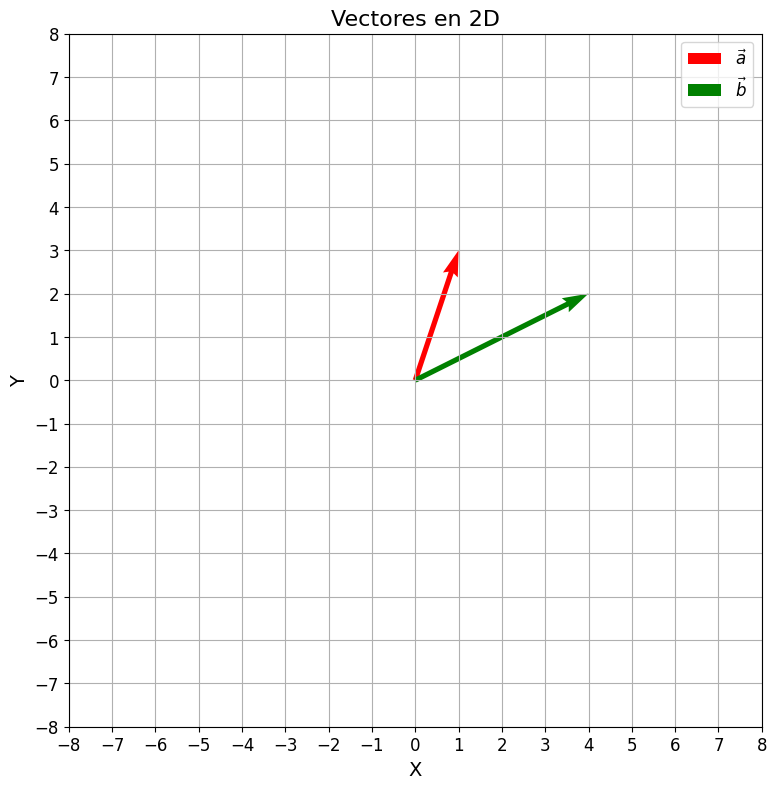

In [ ]:
fig1, (ax1) = plt.subplots(1, 1, figsize=(18, 9))


q1 = ax1.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r')
q2 = ax1.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='g')

ax1.legend([q1, q2], [r'$\vec{a}$', r'$\vec{b}$'], fontsize=12)


ax1.set_aspect('equal', 'box')
ax1.grid(True)
ax1.set_xticks(np.arange(-11, 11, 1))
ax1.set_yticks(np.arange(-11, 11, 1))
ax1.set_xlabel('X', fontsize=14)
ax1.set_ylabel('Y', fontsize=14)
ax1.set_ylim(-8, 8)
ax1.set_xlim(-8, 8)
ax1.set_title('Vectores en 2D', fontsize=16)
ax1.tick_params(axis='both', labelsize=12)

# Operaciones con matrices

## Suma, Resta y Multiplicación escalar

## Operaciones con matrices 4×4

Vamos a usar las siguientes matrices


A = \begin{pmatrix}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
9 & 10 & 11 & 12\\
13 & 14 & 15 & 16
\end{pmatrix}

B = \begin{pmatrix}
16 & 15 & 14 & 13\\
12 & 11 & 10 & 9\\
8 & 7 & 6 & 5\\
4 & 3 & 2 & 1
\end{pmatrix}


In [ ]:
#Proyecciones de vectores
# mismo numero de filas y columnas = matrices cuadradas se puede operar
# m = columna
# n = fila
# m = 1 vector fila
# n = 1 vector columna

A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])

B = np.array([[16, 15, 14, 13],
              [12, 11, 10, 9],
              [8, 7, 6, 5],
              [4, 3, 2, 1]])


In [ ]:
print("Matriz A:\n", A)
print("\nMatriz B:\n", B)

Matriz A:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Matriz B:
 [[16 15 14 13]
 [12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]]


In [ ]:
# Suma
print("\nA + B =\n", A + B)



A + B =
 [[17 17 17 17]
 [17 17 17 17]
 [17 17 17 17]
 [17 17 17 17]]


In [ ]:
# Resta
print("\nA - B =\n", A - B)


A - B =
 [[-15 -13 -11  -9]
 [ -7  -5  -3  -1]
 [  1   3   5   7]
 [  9  11  13  15]]


In [ ]:
# Multiplicación escalar
escalar = 3
print(f"\n{escalar} · A =\n", escalar * A)


3 · A =
 [[ 3  6  9 12]
 [15 18 21 24]
 [27 30 33 36]
 [39 42 45 48]]


In [ ]:
escalar = 1.5
print(f"\n{escalar} · B =\n", escalar * B)


1.5 · B =
 [[24.  22.5 21.  19.5]
 [18.  16.5 15.  13.5]
 [12.  10.5  9.   7.5]
 [ 6.   4.5  3.   1.5]]


##Multiplicación matricial

## Multiplicación de matrices 3×5 y 5×7

Aquí veremos cómo multiplicar una matriz de dimensiones 3x5 por una 5 x 7 da como resultado una matriz 3 x 7

In [ ]:
#Dos matrices se multiplican fila por columna

C = np.arange(1, 16).reshape(3, 5)
D = np.arange(1, 36).reshape(5, 7)

In [ ]:

#Para multiplicar dos matrices tiene que ser iguales. En este caso, el 5 es igual.

print("Matriz C (3×5):\n", C)
print("\nMatriz D (5×7):\n", D)



Matriz C (3×5):
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]

Matriz D (5×7):
 [[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28]
 [29 30 31 32 33 34 35]]


In [ ]:
# Producto de matrices
producto = C @ D
print("\nC @ D (3×7):\n", producto)


C @ D (3×7):
 [[ 295  310  325  340  355  370  385]
 [ 670  710  750  790  830  870  910]
 [1045 1110 1175 1240 1305 1370 1435]]


Y si intentamos hacer una multiplicacion matricial con las dimensiones incorrectas?

In [ ]:
E = np.arange(1, 7).reshape(2, 3)
F = np.arange(1, 13).reshape(4, 3)

print("Matriz E (2×3):\n", E)
print("\nMatriz F (4×3):\n", F)


Matriz E (2×3):
 [[1 2 3]
 [4 5 6]]

Matriz F (4×3):
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
#AQUÍ NO SE PUEDEN MULTIPLICAR
print("\nIntentando E @ F...")
E @ F  # Esto provocará un ValueError: shapes (2,3) and (4,3) not aligned


Intentando E @ F...


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

## Multiplicación con matriz identidad y matriz diagonal

En esta sección veremos cómo la **matriz identidad** permite recuperar la matriz original, y cómo una **matriz diagonal** sirve para escalar filas o columnas de una matriz.

Sean  
\
\
A = \begin{pmatrix}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
9 & 10 & 11 & 12\\
13 & 14 & 15 & 16
\end{pmatrix}
I = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}
D = \begin{pmatrix}
2 & 0 & 0 & 0\\
0 & 3 & 0 & 0\\
0 & 0 & 4 & 0\\
0 & 0 & 0 & 5
\end{pmatrix}


- Al multiplicar \(I \,A\) o \(A\,I\), se debe obtener de nuevo \(A\).  
- Al multiplicar \(D\,A\) escalamos cada **fila** \(i\) de \(A\) por \(d_i\).  
- Al multiplicar \(A\,D\) escalamos cada **columna** \(j\) de \(A\) por \(d_j\).

In [ ]:
# %%
import numpy as np

# Definimos A, I y D
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])
B = np.array([[1, 1, 1, 1],
              [1, 1, 1, 1],
              [1, 1, 1, 1],
              [1, 1, 1, 1]])

I = np.eye(4, dtype=int)
D = np.diag([2, 3, 4, 5])


In [ ]:

print("Matriz A:\n", A)
print("Matriz B:\n", B)
print("\nMatriz identidad I (4×4):\n", I)
print("\nMatriz diagonal D = diag(2,3,4,5):\n", D)


Matriz A:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Matriz B:
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

Matriz identidad I (4×4):
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

Matriz diagonal D = diag(2,3,4,5):
 [[2 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 5]]


In [ ]:
#Matriz identidad: solo la diagonal a 1. Si lo multiplico con la matriz identidad me devuelve la misma matriz
# I · A y A · I
print("\nI @ A =\n", I @ A)
print("\nA @ I =\n", A @ I)



I @ A =
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

A @ I =
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [ ]:
# D · B (escala filas)
print("\nD @ B (cada fila i de B x d_i):\n", D @ B)



D @ B (cada fila i de B x d_i):
 [[2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]]


In [ ]:
# B · D (escala columnas)
print("\nB @ D (cada columna j de B x d_j):\n", B @ D)


B @ D (cada columna j de B x d_j):
 [[2 3 4 5]
 [2 3 4 5]
 [2 3 4 5]
 [2 3 4 5]]


# Transformaciones Lineales

## Ejemplos de tranformaciones sencillas - trasquilado

Usaremos la matriz A (llamada matriz de cizallamiento) para transformar el vector v por una transformacion lineal de trasquilado

A =
     \begin{pmatrix}
       1 & 3 \\[6pt]
       0 & 1 \\[6pt]
     \end{pmatrix}

v = (2, 2)


In [ ]:
#transformaciones lineales: moverse a otro espacio con otra dimension R^n -> R^m
#propiedades:
# T(y + x) = T(x)+ (y)
# t(cx) = cT(x)

In [ ]:
A = np.array([[1, 3],
              [0, 1]])
v = np.array([2, 2])

v_sheared = A @ v.T


In [ ]:
print(A.shape)

(2, 2)


In [ ]:
print("Matriz A =\n", A)
print("Vector original v =", v)
print("Vector transformado A @ v =", v_sheared)

Matriz A =
 [[1 3]
 [0 1]]
Vector original v = [2 2]
Vector transformado A @ v = [8 2]


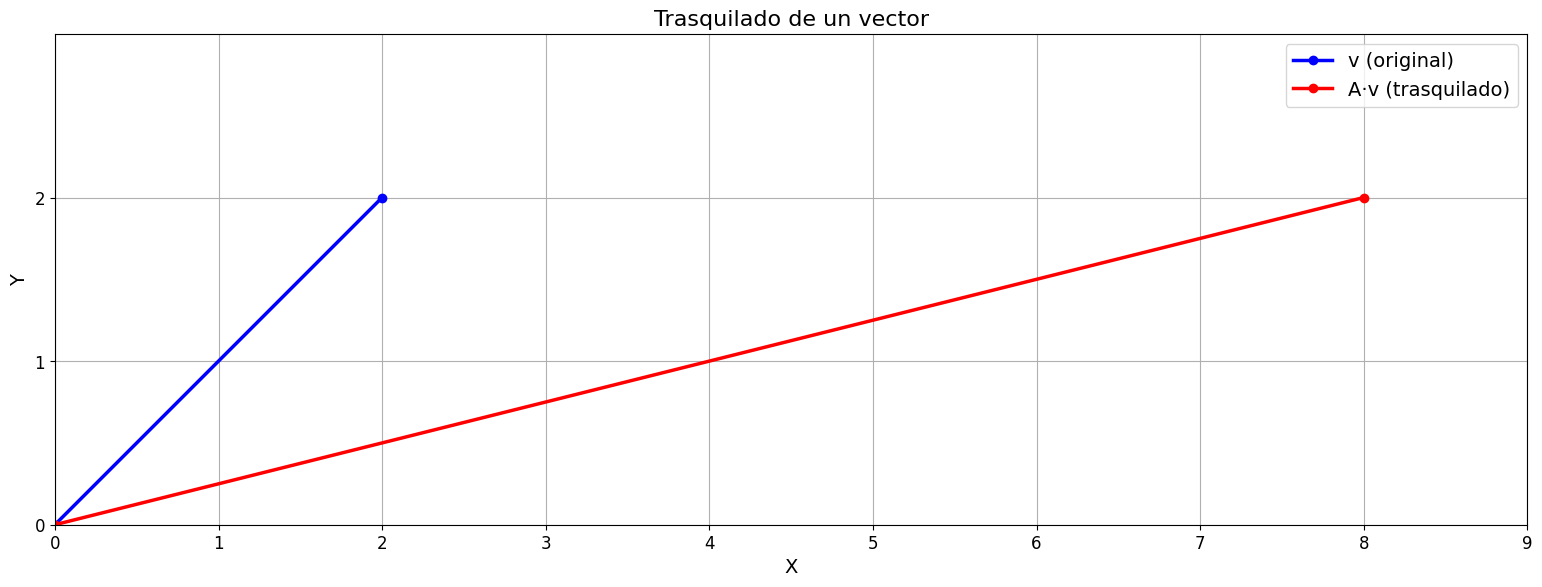

In [ ]:
fig, ax = plt.subplots(figsize=(19, 8))
ax.plot([0, v[0]],        [0, v[1]],        marker='o', label='v (original)', color='blue', linewidth=2.5)
ax.plot([0, v_sheared[0]], [0, v_sheared[1]], marker='o', label='A·v (trasquilado)', color='red', linewidth=2.5)
ax.set_aspect('equal', 'box')
ax.set_xlim(0, max(v_sheared[0], v[0]) + 1)
ax.set_ylim(0, max(v_sheared[1], v[1]) + 1)
ax.grid(True)
ax.set_yticks(np.arange(0, 3, 1))
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_title('Trasquilado de un vector', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

ax.legend(fontsize=14)
plt.show()

## Transformaciones lineales con imágenes

Vamos a enseñar la utilidad de las transformaciones lineales con imágenes. Para no complicarnos demasiado vamos a usar una imagen en blanco y negro, una clasica ademas.

Para no hacer todo a mano, vamos a usar  transform.AffineTransform para aplicar nuestras transformaciones lineales

Imagen original: shape = (512, 512), dtype = uint8


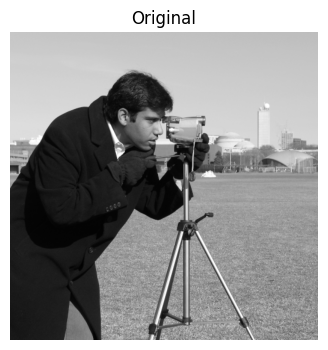

In [ ]:
image = data.camera()
h, w = image.shape
print(f"Imagen original: shape = {image.shape}, dtype = {image.dtype}")

plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off');


Para hacer el giro de una imagen, vamos a usar operaciones trigonométricas, por lo que nuestra matriz para la transformacion lineal va a ser
$
M_{\mathrm{rot}} = \begin{pmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{pmatrix},\; \theta = \frac{\pi}{6}.
$

Matriz de rotación (30°):
 [[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
Imagen rotada: shape = (512, 512), dtype = float64


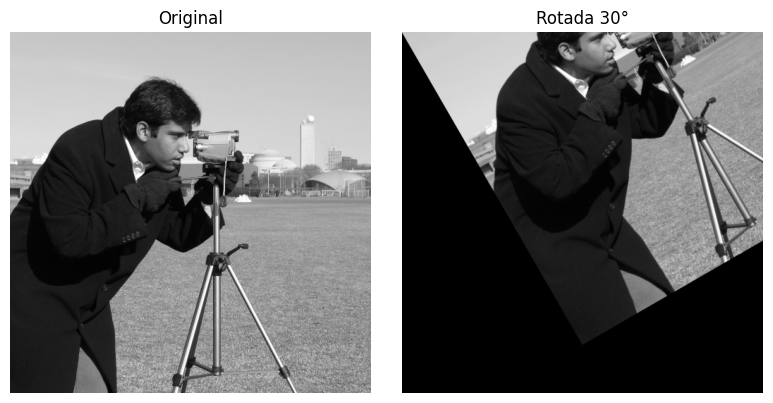

In [ ]:
theta = np.deg2rad(30)
M_rot = np.array([
    [np.cos(theta),  np.sin(theta), 0],
    [-np.sin(theta), np.cos(theta), 0],
    [0,              0,             1]
])

print("Matriz de rotación (30°):\n", M_rot)

# Creamos el objeto AffineTransform
tform_rot = transform.AffineTransform(matrix=M_rot)

# Aplicamos la transformación (invierte la matriz internamente)
rotated = transform.warp(image, inverse_map=tform_rot.inverse,
                         output_shape=(h, w), preserve_range=True)

print(f"Imagen rotada: shape = {rotated.shape}, dtype = {rotated.dtype}")

# Mostramos lado a lado
fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].imshow(image,   cmap='gray'); axes[0].set_title("Original"); axes[0].axis('off')
axes[1].imshow(rotated, cmap='gray'); axes[1].set_title("Rotada 30°"); axes[1].axis('off')
plt.tight_layout();

Para hacer el reflejo horizontal, es decir, el efecto espejo, vamos a usar la siguiente matriz:

$
M_{\mathrm{ref}} = \begin{pmatrix}
-1 & 0 & w - 1 \\
0  & 1 & 0     \\
0  & 0 & 1
\end{pmatrix}
$


Matriz de reflexión horizontal:
 [[-1, 0, 511], [0, 1, 0], [0, 0, 1]]
Imagen reflejada: shape = (512, 512)


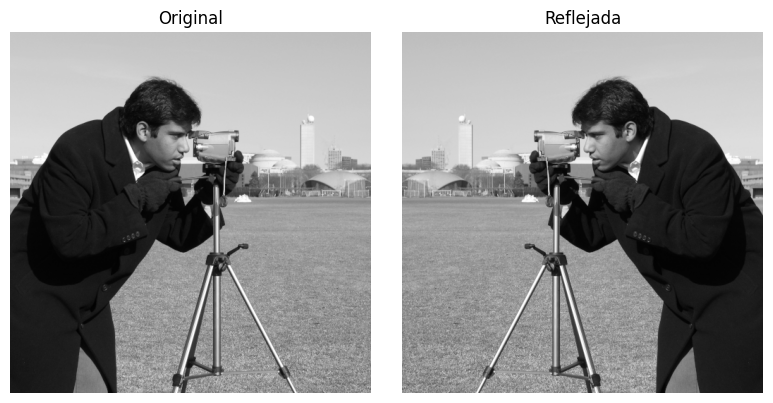

In [ ]:
# Cell 3: Reflejo horizontal (espejo)
# Definimos la matriz de reflexión respecto al eje vertical que pasa por x = (w-1)/2
# Para reflejar en el margen izquierdo, usamos:
M_ref = ([[-1, 0, w-1],
    [0, 1, 0],
    [0,              0,             1]
])
print("Matriz de reflexión horizontal:\n", M_ref)

tform_ref = transform.AffineTransform(matrix=M_ref)
reflected = transform.warp(image, inverse_map=tform_ref.inverse,
                           output_shape=(h,w), preserve_range=True)
print(f"Imagen reflejada: shape = {reflected.shape}")

fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].imshow(image,     cmap='gray'); axes[0].set_title("Original"); axes[0].axis('off')
axes[1].imshow(reflected, cmap='gray'); axes[1].set_title("Reflejada"); axes[1].axis('off')
plt.tight_layout();

Y ahora para una reducción de la imagen, vamos a usar la siguiente matriz:

$
M_{\mathrm{scale}} = \begin{pmatrix}
\mathrm{scale} & 0 & 0 \\
0 & \mathrm{scale} & 0 \\
0 & 0 & 1
\end{pmatrix}
$

Matriz de escala (0.5×):
 [[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]
Imagen escalada al 50 %: shape = (256, 256), dtype = float64


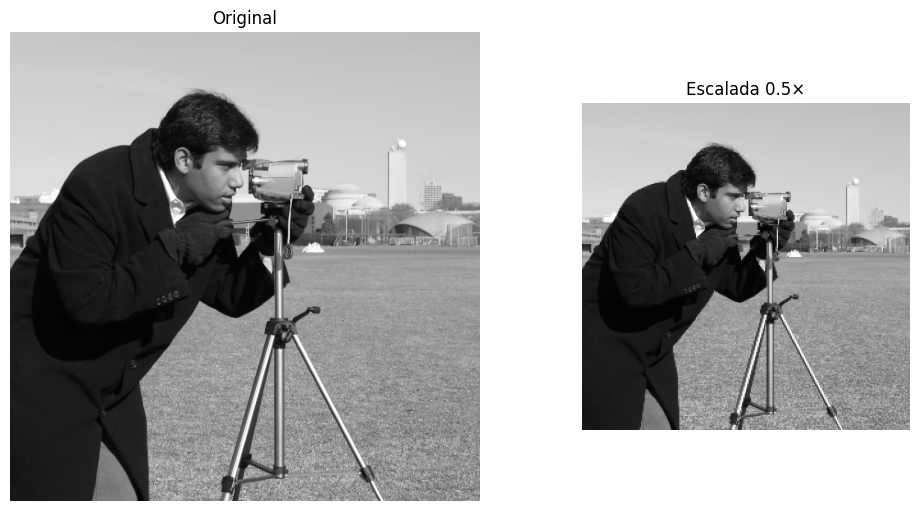

In [ ]:
# Cell 4: Reducción (escala 0.5×)
scale = 0.5
M_scale = np.array([[scale, 0, 0], [0, scale, 0], [0, 0, 1]])
print("Matriz de escala (0.5×):\n", M_scale)

tform_scale = transform.AffineTransform(matrix=M_scale)
new_h, new_w = int(h * scale), int(w * scale)
scaled_half = transform.warp(image,
                             inverse_map=tform_scale.inverse,
                             output_shape=(new_h, new_w),
                             preserve_range=True)
print(f"Imagen escalada al 50 %: shape = {scaled_half.shape}, dtype = {scaled_half.dtype}")

# Dimensiones originales y reducidas
h, w = image.shape
new_h, new_w = scaled_half.shape

# Creamos la figura con subplots cuyo ancho está en proporción w : new_w
fig, axes = plt.subplots(1, 2,
                         figsize=(10, 5),
                         gridspec_kw={'width_ratios': [w, new_w]},
                         constrained_layout=True)

# Mostramos las imágenes (ya no necesitamos ajustar aspect, pues el propio ancho relativo lo gestiona)
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(scaled_half, cmap='gray')
axes[1].set_title("Escalada 0.5×")
axes[1].axis('off')

plt.show()


## Cambios de dimensiones con transformaciones lineales

En este ejemplo vamos a realizar dos ejemplos muy simples para ilustrar el **aumento** y la **reducción** de dimensionalidad mediante transformaciones lineales:

1. **Transformación 2D → 3D**  
   Usando la matriz
   \
     A =
     \begin{pmatrix}
       1 & 0 \\[6pt]
       0 & 1 \\[6pt]
       0 & 0
     \end{pmatrix}
   \
   Aplicaremos la transformacion a los vértices de un cuadrado en R2 para pasarlo a R3

2. **Proyección 3D → 2D**  
   Usaremos la matriz
   \
     P =
     \begin{pmatrix}
       1 & 0 & 0 \\[6pt]
       0 & 1 & 0
     \end{pmatrix}
   \
   Generaremos puntos aleatorios en \(\mathbb{R}^3\) y los proyectaremos al plano \(xy\), descartando la coordenada z\.

En ambos casos la **dimensión de la imagen** está limitada por el rango de la matriz (\(\le\min(n,m)\)).

Text(0, 0.5, 'y')

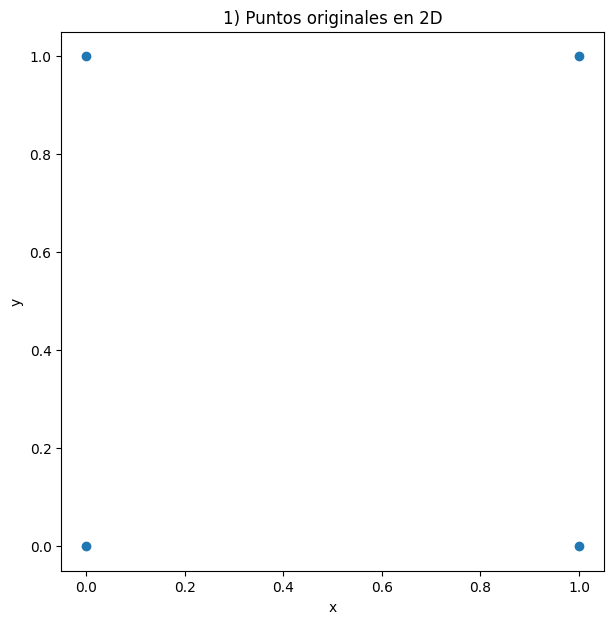

In [ ]:
# --- Ejemplo 2: Proyección 2D → 3D ---
points_2d = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
A = np.array([[1, 0],
              [0, 1],
              [0, 0]])
points_3d = points_2d.dot(A.T)

plt.figure(figsize=(7, 7))
plt.scatter(points_2d[:, 0], points_2d[:, 1])
plt.title("1) Puntos originales en 2D")
plt.xlabel("x")
plt.ylabel("y")

Text(0.5, 0, "z'")

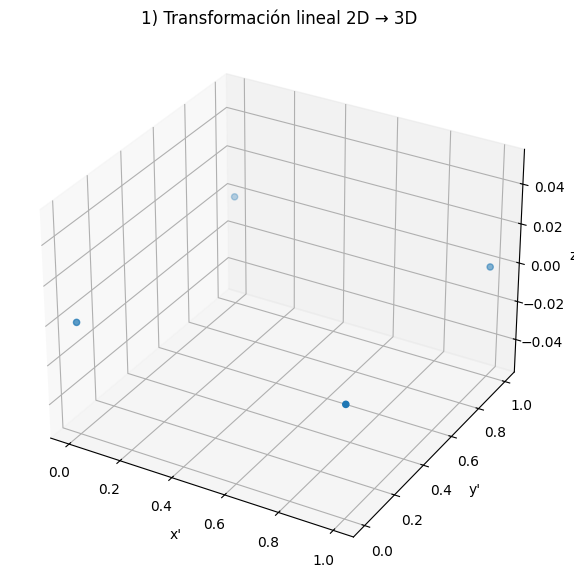

In [ ]:
# Plot transformado en 3D
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2])
ax.set_title("1) Transformación lineal 2D → 3D")
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_zlabel("z'")

In [ ]:
# --- Ejemplo 2: Proyección 3D → 2D ---
points_3d_random = np.random.rand(50, 3)
P = np.array([[1, 0, 0],
              [0, 1, 0]])  # Matriz 2x3
points_proj = points_3d_random.dot(P.T)

Text(0.5, 0, 'z')

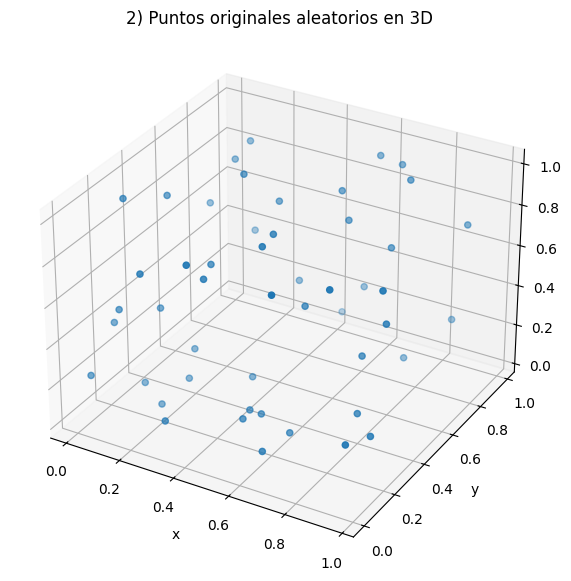

In [ ]:
# Plot original 3D
fig2 = plt.figure(figsize=(7, 7))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(points_3d_random[:, 0], points_3d_random[:, 1], points_3d_random[:, 2])
ax2.set_title("2) Puntos originales aleatorios en 3D")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

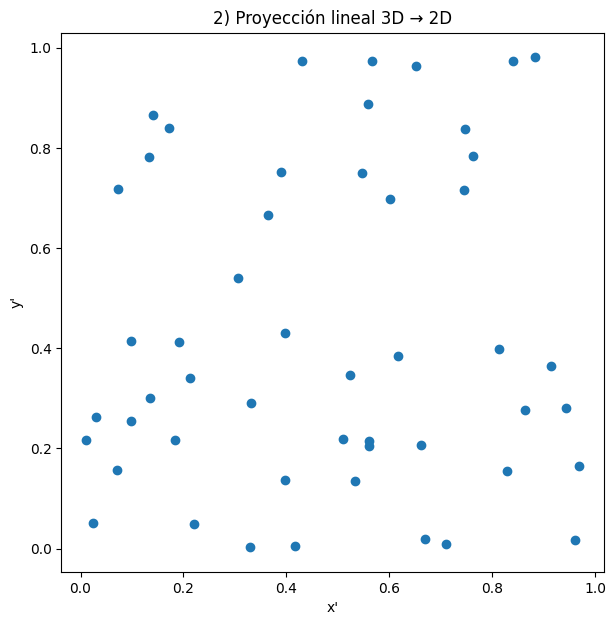

In [ ]:
# Plot proyectado en 2D
plt.figure(figsize=(7, 7))
plt.scatter(points_proj[:, 0], points_proj[:, 1])
plt.title("2) Proyección lineal 3D → 2D")
plt.xlabel("x'")
plt.ylabel("y'")

plt.show()

## Demostracion de propiedades de las transformaciones lineales

Vamos a demostrar las propiedades:
-  T(u + v) = T(u) + T(v)
- T(c·u) = c·T(u)

Usando la siguiente transformacion lineal:

$
[
\theta = \frac{\pi}{6} \quad (30^\circ)
]
[
T =
\begin{pmatrix}
  \cos\theta & -\sin\theta \\[6pt]
  \sin\theta & \cos\theta
\end{pmatrix}
]
$

Sobre unos vectores [0,1] y [1,0]

In [ ]:
# Definimos una transformación lineal T (rotación de 30°)
theta = np.deg2rad(30)
T = np.array([
    [np.cos(theta),  -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Vectores de ejemplo
u = np.array([0,1])
v = np.array([1,0])
sum_uv = u + v

# Aplicamos T
Tu = T.dot(u)
Tv = T.dot(v)
Tuv = T.dot(sum_uv)


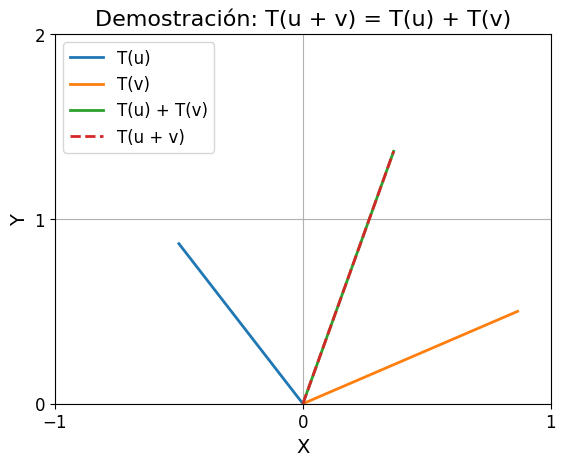

In [ ]:
sum_Tu_Tv = Tu + Tv

fig, ax = plt.subplots()

# Plot the vectors
ax.plot([0, Tu[0]], [0, Tu[1]], label='T(u)', linewidth=2)
ax.plot([0, Tv[0]], [0, Tv[1]], label='T(v)', linewidth=2)
ax.plot([0, sum_Tu_Tv[0]], [0, sum_Tu_Tv[1]], label='T(u) + T(v)', linewidth=2)
ax.plot([0, Tuv[0]], [0, Tuv[1]], '--', label='T(u + v)', linewidth=2)

ax.grid(True)
ax.set_xticks(np.arange(-10, 11, 1))
ax.set_yticks(np.arange(-10, 11, 1))
ax.set_xlim(-1, 1)
ax.set_ylim(0, 2)

ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_title('Demostración: T(u + v) = T(u) + T(v)', fontsize=16)

ax.tick_params(axis='both', labelsize=12)

ax.legend(fontsize=12)
plt.show()

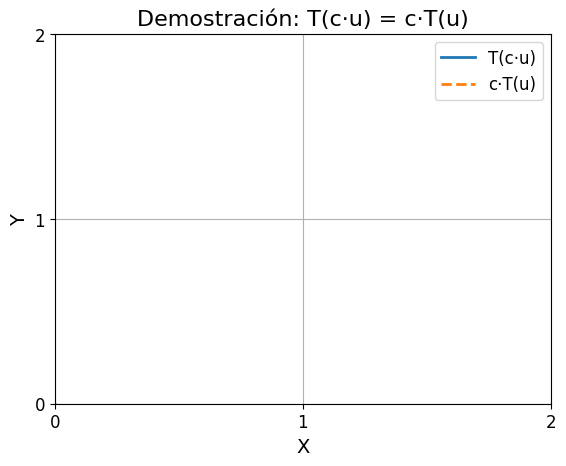

In [ ]:
# Asummos que u, T, Tu ya estan definidos
c = 2
cu = c * u
T_cu = T.dot(cu)
cTu = c * Tu

fig, ax = plt.subplots()

# Plot T(c·u) and c·T(u)
ax.plot([0, T_cu[0]], [0, T_cu[1]], label='T(c·u)', linewidth=2)
ax.plot([0, cTu[0]], [0, cTu[1]], '--', label='c·T(u)', linewidth=2)


ax.grid(True)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_title('Demostración: T(c·u) = c·T(u)', fontsize=16)

ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)


# Determinante e Interpretación Geométrica - Ejemplo 2D

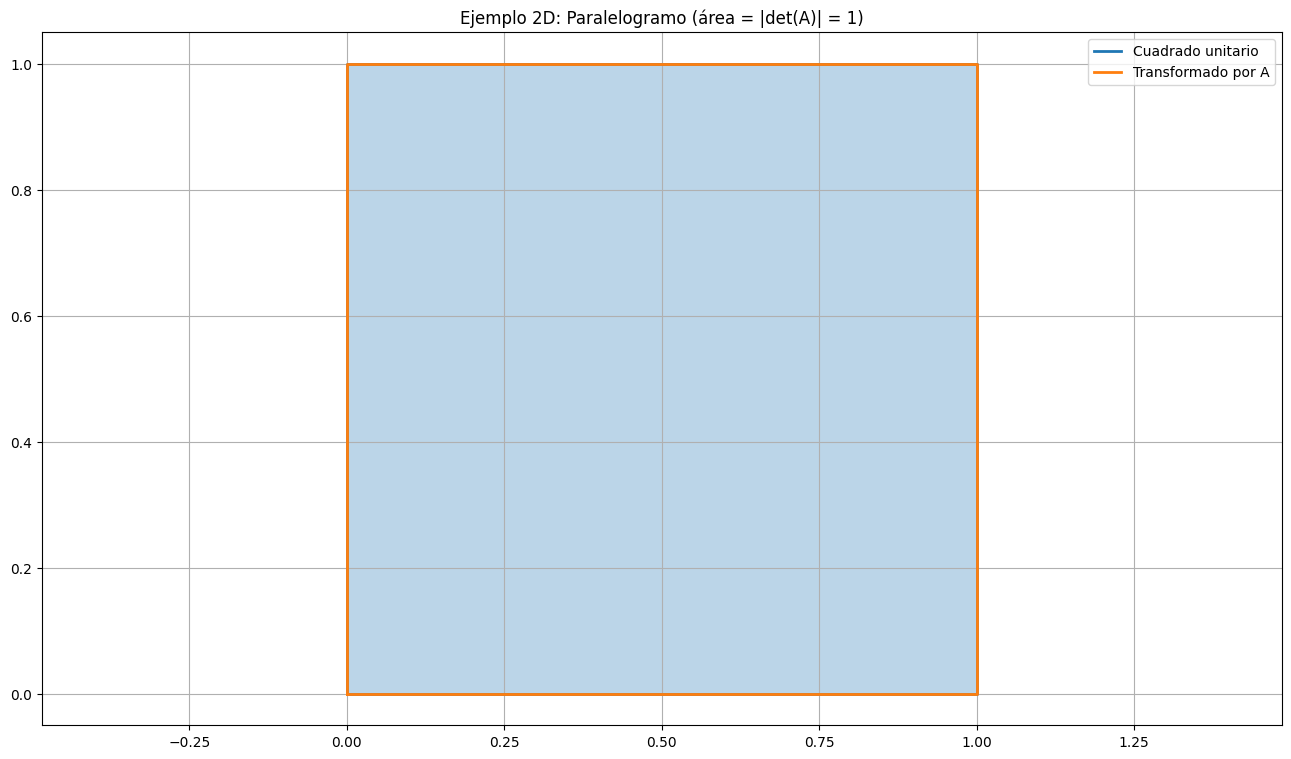

In [ ]:
# Definimos A y el cuadrado unitario
A = np.array([[1,0], [0,1]])
# Calculamos el determinante
detA = np.linalg.det(A)

#Para visualizar
square = np.array([[0,0],
                   [1,0],
                   [1,1],
                   [0,1],
                   [0,0]])

# Aplicamos la transformación
sq_trans = square.dot(A.T)

# Dibujamos
plt.figure(figsize=(16,9))


plt.plot(square[:,0], square[:,1], linewidth=2, label='Cuadrado unitario')
plt.plot(sq_trans[:,0], sq_trans[:,1], linewidth=2, label='Transformado por A')
plt.fill(sq_trans[:,0], sq_trans[:,1], alpha=0.3)
plt.title(f'Ejemplo 2D: Paralelogramo (área = |det(A)| = {abs(detA):.0f})')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


# Determinante e Interpretación Geométrica - Ejemplo 3D

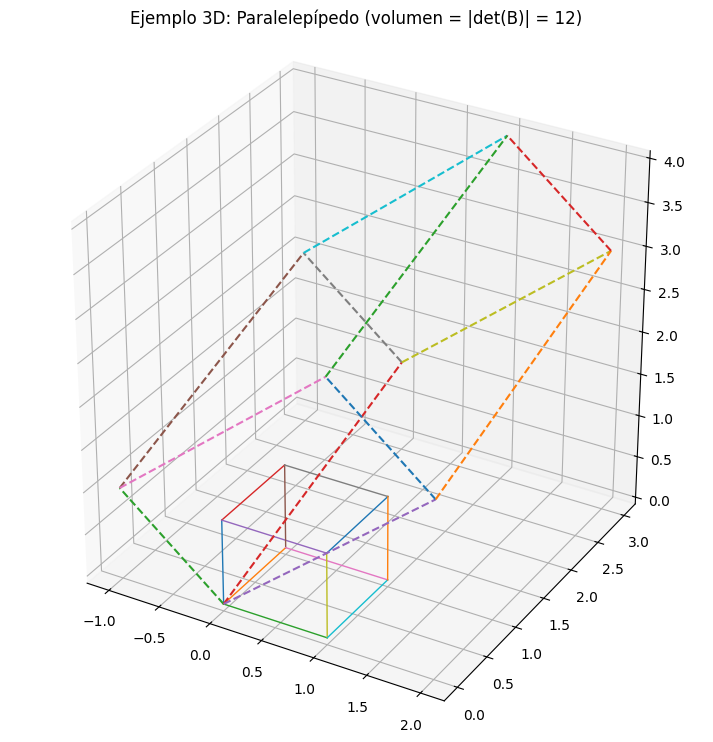

In [ ]:
# Definimos B y el cubo unitario
B = np.array([[2,0,-1],
              [0,3,0],
               [2,1,1]])
# Calculamos el determinante
detB = np.linalg.det(B)

# Por motivos de visualizacion
cube = np.array([[x,y,z] for x in [0,1] for y in [0,1] for z in [0,1]])

# Transformación
cube_trans = cube.dot(B.T)

# Generamos aristas del cubo
edges = []
for i in range(len(cube)):
    for j in range(i+1, len(cube)):
        if np.sum(np.abs(cube[i] - cube[j])) == 1:
            edges.append((i,j))

# Dibujamos todo
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

# dibujamos el cubo original
for e in edges:
    ax.plot(
        cube[[e[0],e[1]],0],
        cube[[e[0],e[1]],1],
        cube[[e[0],e[1]],2],
        linewidth=1
    )
# Dibujamos el cubo transformado
for e in edges:
    ax.plot(
        cube_trans[[e[0],e[1]],0],
        cube_trans[[e[0],e[1]],1],
        cube_trans[[e[0],e[1]],2],
        linestyle='--', linewidth=1.5
    )

ax.set_title(f'Ejemplo 3D: Paralelepípedo (volumen = |det(B)| = {abs(detB):.0f})')
ax.set_box_aspect([1,1,1])
plt.show()

# Inversion de matrices

In [ ]:
#iNVERSA: deshago la transformacion lineal

# 1) Definimos la matriz A y el vector v
A = np.array([[1, 3],
              [0, 1]])
v = np.array([2,2])

# 2) Aplicamos A para producir el vector de trasquilado
# v_sheared = ?
print("v (original):", v)
print("A · v (trasquilado):", v_sheared)



v (original): [2 2]
A · v (trasquilado): [8 2]


In [ ]:
# 3) Calculamos la inversa de A y “deshacemos” el trasquilado
A_inv = np.linalg.inv(A)
v_restored = A_inv @ v_sheared
print("A⁻¹ · (A · v) (restaurado):", v_restored)

A⁻¹ · (A · v) (restaurado): [2. 2.]


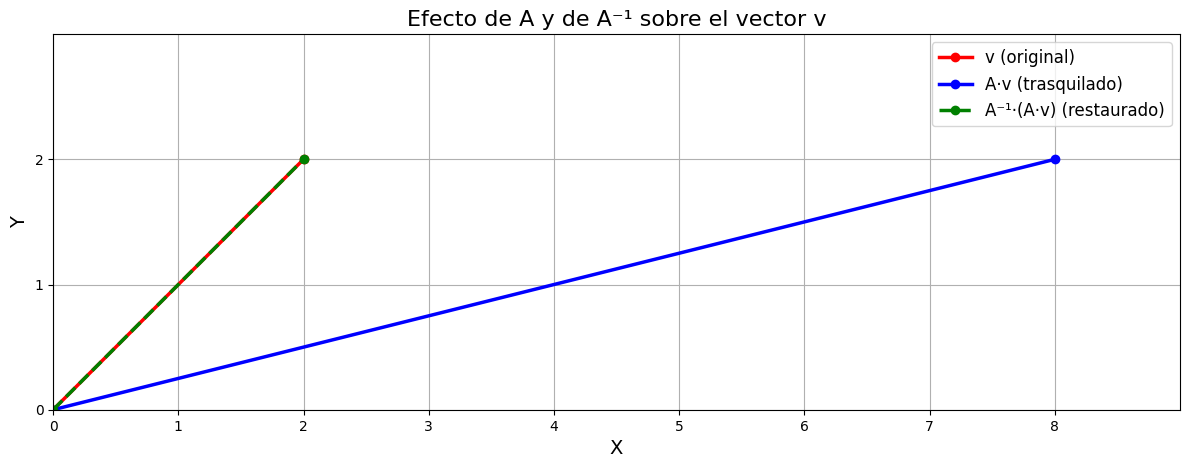

In [ ]:
# 4) Trazamos los tres vectores
fig, ax = plt.subplots(figsize=(12, 8))

# Vector original
ax.plot([0, v[0]], [0, v[1]],
        marker='o', label='v (original)',
        color='red',  linewidth=2.5)

# Vector sheared
ax.plot([0, v_sheared[0]], [0, v_sheared[1]],
        marker='o', label='A·v (trasquilado)',
        color='blue', linewidth=2.5)

# Vector restaurado
ax.plot([0, v_restored[0]], [0, v_restored[1]],
        marker='o', label='A⁻¹·(A·v) (restaurado)', linestyle='--',
        color='green', linewidth=2.5)

# Ajustes de la gráfica
ax.set_aspect('equal', 'box')
max_x = max(v[0], v_sheared[0], v_restored[0]) + 1
max_y = max(v[1], v_sheared[1], v_restored[1]) + 1
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)
ax.grid(True)
ax.set_xticks(np.arange(0, max_x, 1))
ax.set_yticks(np.arange(0, max_y, 1))
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_title('Efecto de A y de A⁻¹ sobre el vector v', fontsize=16)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# 4x + 2y + 4z = 44
# 5x + 3y + 7z = 56
# 9x + 3y + 6z = 72

A = np.array([[4,2,4],
              [5,3,7],
              [9,3,6]])

# B = ?
B = np.array([44,56,72])

# X = ?
X = np.linalg.inv(A) @ B
# X = np.linalg.solve(A, B)

print(X)
print(X)

[ 2. 34. -8.]
[ 2. 34. -8.]


Empresa de transportes

Una empresa gestiona una flota de 60 camiones de tres modelos diferentes.

Diariamente los camiones transportan un total de 475 toneladas y recorren 12 500 kilómetros entre todos los camiones.

Los grandes transportan diariamente 15 000 kilogramos y recorren de media 400 kilómetros.

Los medianos transportan diariamente 10 000 kilogramos y recorren de media 300 kilómetros.

Los pequeños transportan diariamente 5 000 kilogramos y recorren de media 100 kilómetros.

¿Cuántos camiones gestiona la empresa de cada modelo de camión?